## Handwritten Digit Classification using CNN on MNIST Dataset
This notebook demonstrates how to classify handwritten digits (0-9) using a Convolutional Neural Network (CNN) built with TensorFlow/Keras.

In [1]:
# Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.datasets import mnist

## Load and Preprocess the MNIST Dataset
The MNIST dataset contains 70,000 grayscale images of handwritten digits (28×28 pixels). We'll normalize, reshape, and one-hot encode it.

In [2]:
# Load dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Normalize data (scale pixel values to [0,1])
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape data to add channel dimension (for CNN input)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# One-hot encode the labels
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## Define the CNN Architecture
We'll use two convolutional layers followed by pooling layers, and then two dense layers.

In [3]:
# Initialize the Sequential model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the model with an optimizer, loss function, and evaluation metric.

In [4]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Train the Model
We train for 50 epochs using 20% of the training data as validation set.

In [5]:
history = model.fit(
    X_train,
    Y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=64
)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8380 - loss: 0.5222 - val_accuracy: 0.9737 - val_loss: 0.0850
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9776 - loss: 0.0726 - val_accuracy: 0.9844 - val_loss: 0.0531
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9854 - loss: 0.0479 - val_accuracy: 0.9854 - val_loss: 0.0495
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9898 - loss: 0.0344 - val_accuracy: 0.9863 - val_loss: 0.0447
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9909 - loss: 0.0288 - val_accuracy: 0.9865 - val_loss: 0.0436
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9936 - loss: 0.0201 - val_accuracy: 0.9846 - val_loss: 0.0518
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9947 - loss: 0.0182 - val_accuracy: 0.9860 - val_loss: 0.0520
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9953 - loss: 0.0138 - val_accuracy: 0.

## Evaluate on the Test Data
Predict the test set and evaluate the model using classification metrics.

In [6]:
# Predict class labels
Y_pred = np.argmax(model.predict(X_test), axis=1)
Y_test_labels = np.argmax(Y_test, axis=1)

# Classification metrics
print(classification_report(Y_test_labels, Y_pred))
print("Accuracy:", accuracy_score(Y_test_labels, Y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Accuracy: 0.991


 ## Visualize Accuracy over Epochs
We'll now plot training and validation accuracy to observe learning behavior.

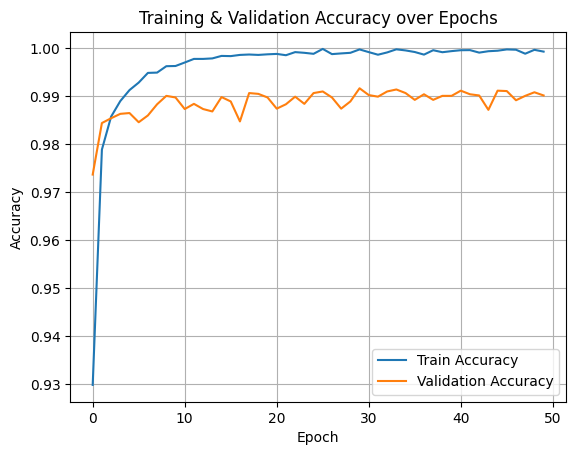

In [7]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy over Epochs')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()